In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score ,classification_report ,confusion_matrix
from sklearn import tree

In [2]:
df = pd.read_csv("fumarbeberpfc.csv", delimiter=";")
df.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0          1   
1  Male   30     180      80       89.0         0.9          1.2          1   
2  Male   40     165      75       91.0         1.2          1.5          1   
3  Male   50     175      80       91.0         1.5          1.2          1   
4  Male   50     165      60       80.0         1.0          1.2          1   

   hear_right  SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0           1  120  ...        126            92        17.1              1   
1           1  130  ...        148           121        15.8              1   
2           1  120  ...         74           104        15.8              1   
3           1  145  ...        104           106        17.6              1   
4           1  138  ...        117           104        13.8              1   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0               1.0        21        35         40                 1       Y  
1               0.9        20        36         27                 3       N  
2               0.9        47        32         68                 1       N  
3               1.1        29        34         18                 1       N  
4               0.8        19        12         25                 1       N  

[5 rows x 24 columns]

In [3]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

### Crear columna IMC

In [4]:
df["IMC"]=df["weight"]/((df["height"]/100)*(df["height"]/100))
df.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0          1   
1  Male   30     180      80       89.0         0.9          1.2          1   
2  Male   40     165      75       91.0         1.2          1.5          1   
3  Male   50     175      80       91.0         1.5          1.2          1   
4  Male   50     165      60       80.0         1.0          1.2          1   

   hear_right  SBP  ...  triglyceride  hemoglobin  urine_protein  \
0           1  120  ...            92        17.1              1   
1           1  130  ...           121        15.8              1   
2           1  120  ...           104        15.8              1   
3           1  145  ...           106        17.6              1   
4           1  138  ...           104        13.8              1   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  \
0               1.0        21        35         40                 1       Y   
1               0.9        20        36         27                 3       N   
2               0.9        47        32         68                 1       N   
3               1.1        29        34         18                 1       N   
4               0.8        19        12         25                 1       N   

         IMC  
0  25.951557  
1  24.691358  
2  27.548209  
3  26.122449  
4  22.038567  

[5 rows x 25 columns]

In [5]:
def assign_status(row):
    if row["SMK_stat_type_cd"] == 3 and row["DRK_YN"] == "Y":
        return "Fuma y Bebe"
    elif row["SMK_stat_type_cd"] == 3 and row["DRK_YN"] == "N":
        return "Fuma y No Bebe"
    elif row["SMK_stat_type_cd"] == 1 and row["DRK_YN"] == "Y":
        return "No Fuma y Bebe"
    elif row["SMK_stat_type_cd"] == 1 and row["DRK_YN"] == "N":
        return "No Fuma y No Bebe"
    elif row["SMK_stat_type_cd"] == 2 and row["DRK_YN"] == "Y":
        return "Ha dejado de fumar y Bebe"
    elif row["SMK_stat_type_cd"] == 2 and row["DRK_YN"] == "N":
        return "Ha dejado de fumar y No Bebe"
    else:
        return "Otro"


df["Smoking_Drinking_Status"] = df.apply(assign_status, axis=1)

df.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0          1   
1  Male   30     180      80       89.0         0.9          1.2          1   
2  Male   40     165      75       91.0         1.2          1.5          1   
3  Male   50     175      80       91.0         1.5          1.2          1   
4  Male   50     165      60       80.0         1.0          1.2          1   

   hear_right  SBP  ...  hemoglobin  urine_protein  serum_creatinine  \
0           1  120  ...        17.1              1               1.0   
1           1  130  ...        15.8              1               0.9   
2           1  120  ...        15.8              1               0.9   
3           1  145  ...        17.6              1               1.1   
4           1  138  ...        13.8              1               0.8   

   SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN        IMC  \
0        21        35         40                 1       Y  25.951557   
1        20        36         27                 3       N  24.691358   
2        47        32         68                 1       N  27.548209   
3        29        34         18                 1       N  26.122449   
4        19        12         25                 1       N  22.038567   

   Smoking_Drinking_Status  
0           No Fuma y Bebe  
1           Fuma y No Bebe  
2        No Fuma y No Bebe  
3        No Fuma y No Bebe  
4        No Fuma y No Bebe  

[5 rows x 26 columns]

In [8]:
df_male = df[df["sex"] == "Male"]

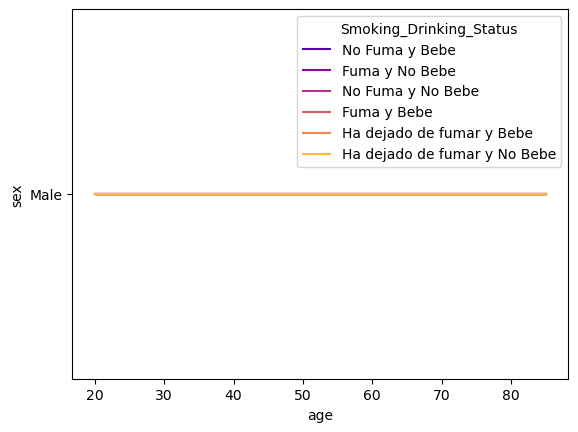

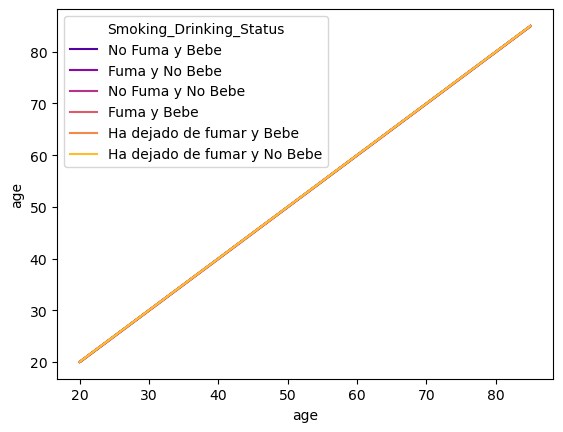

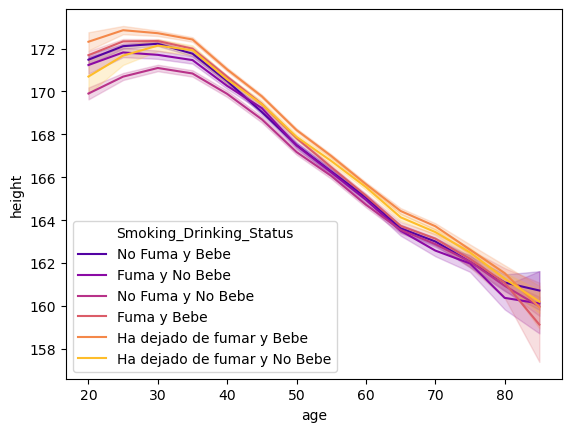

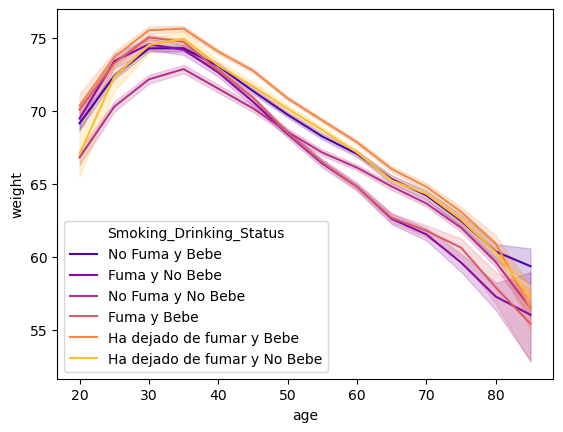

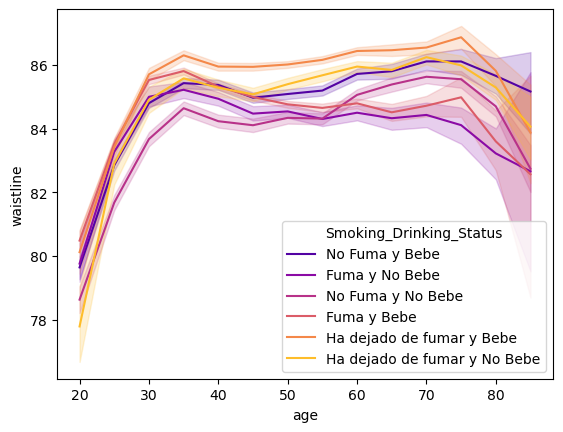

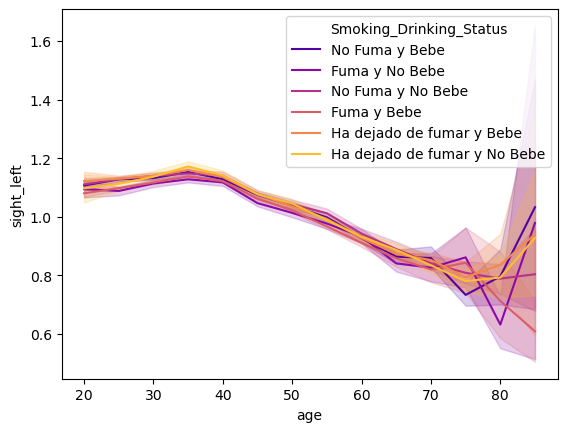

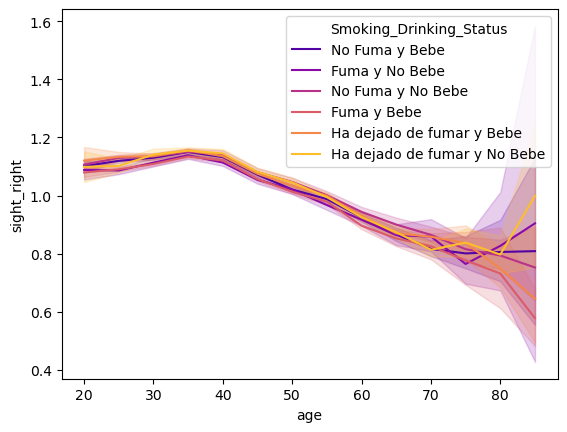

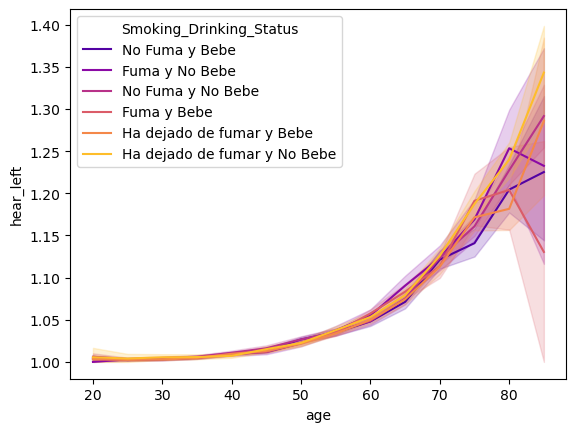

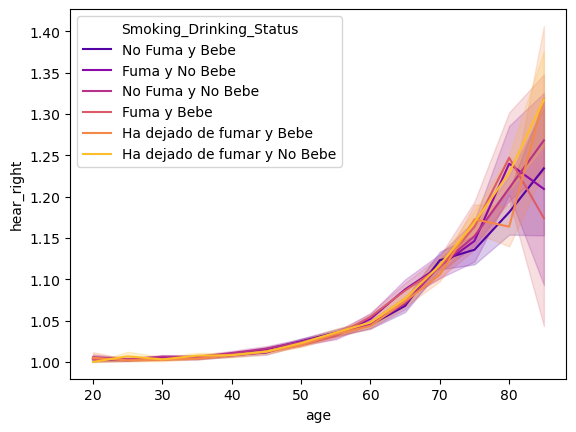

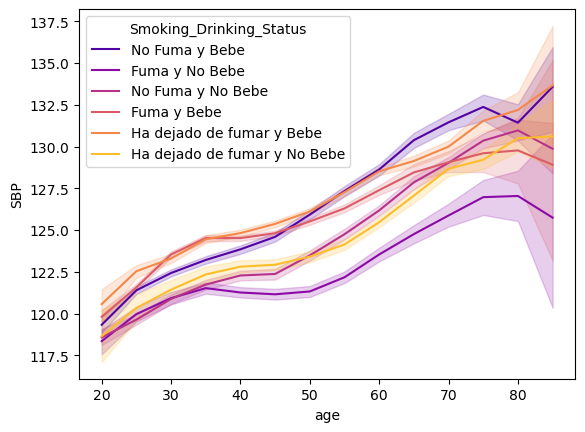

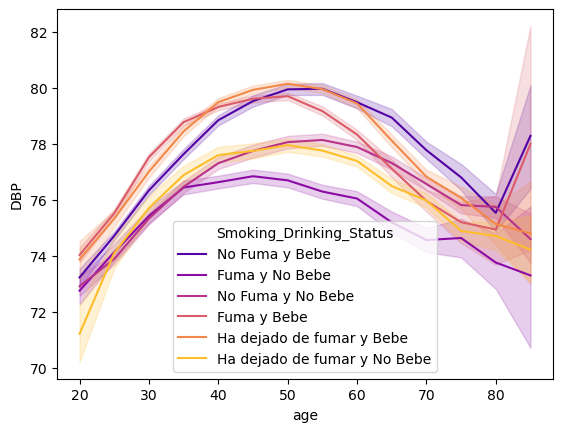

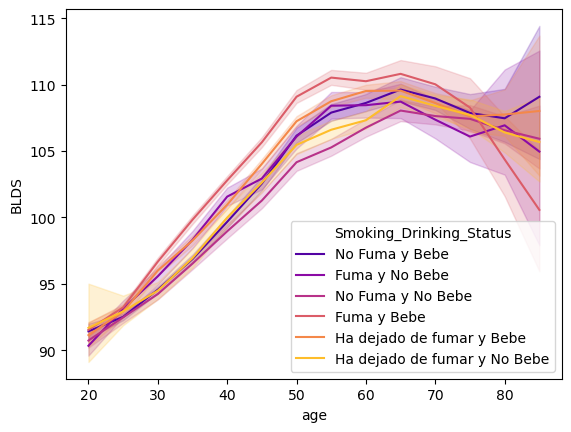

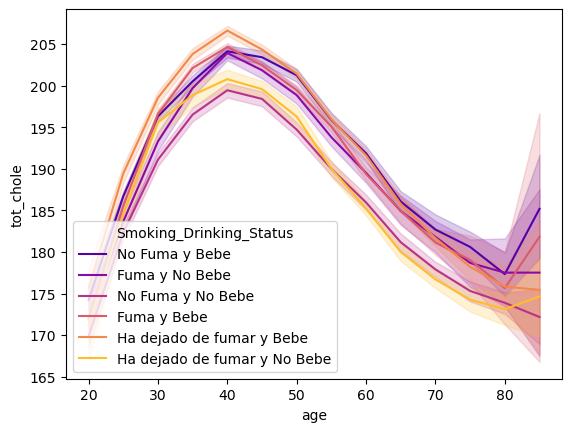

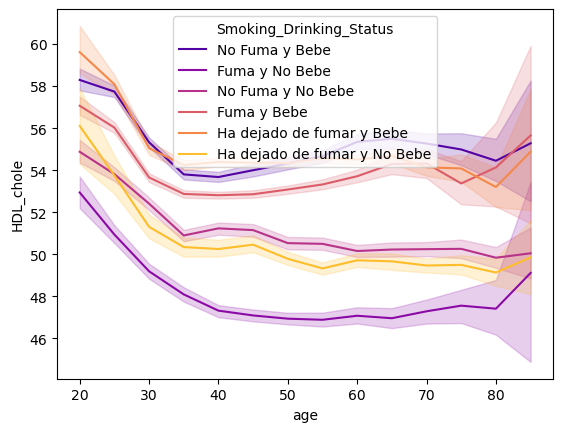

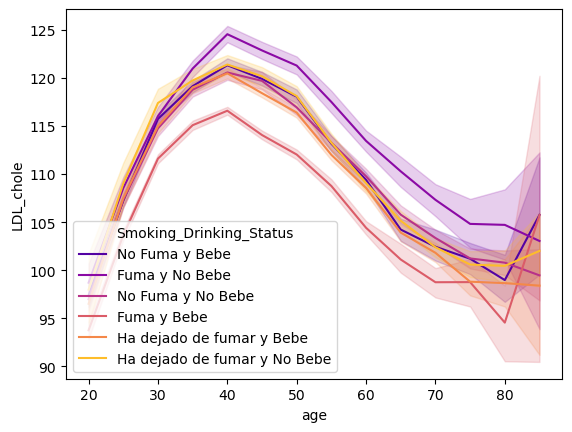

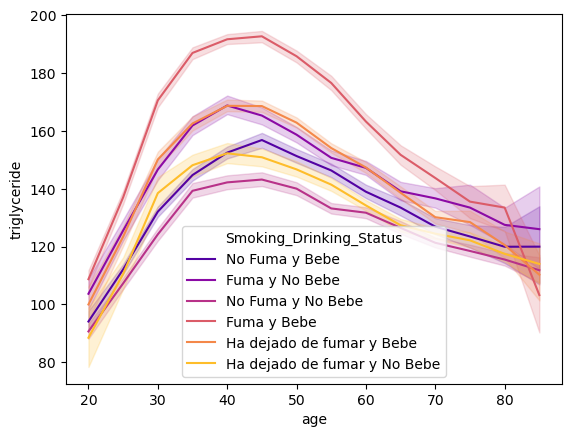

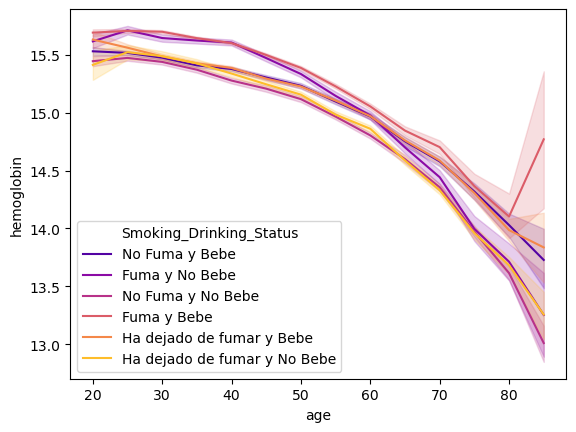

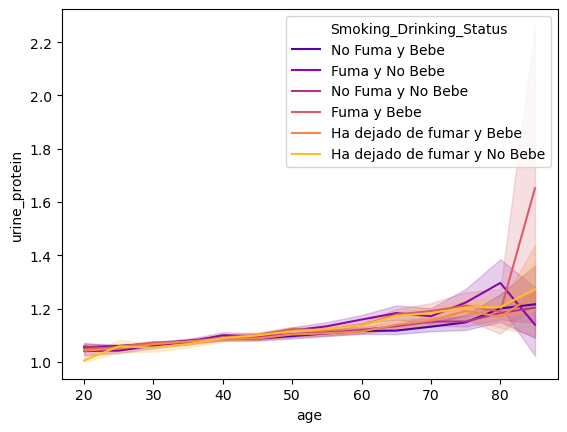

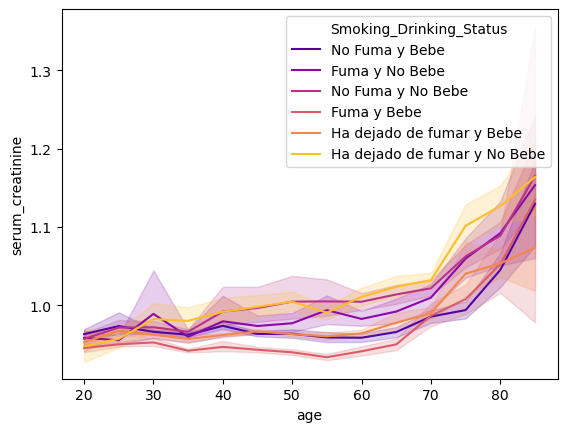

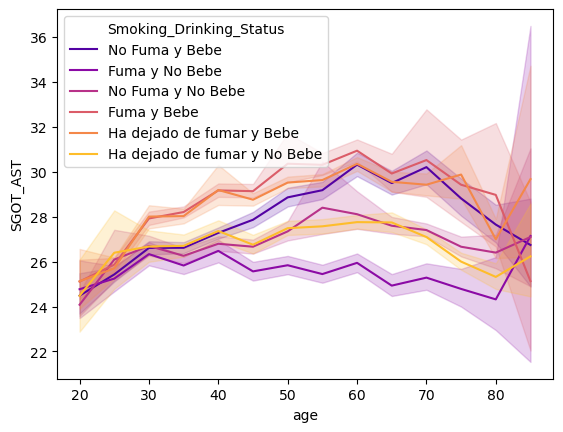

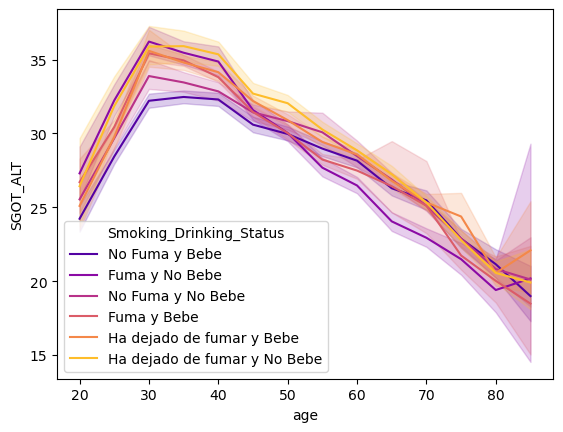

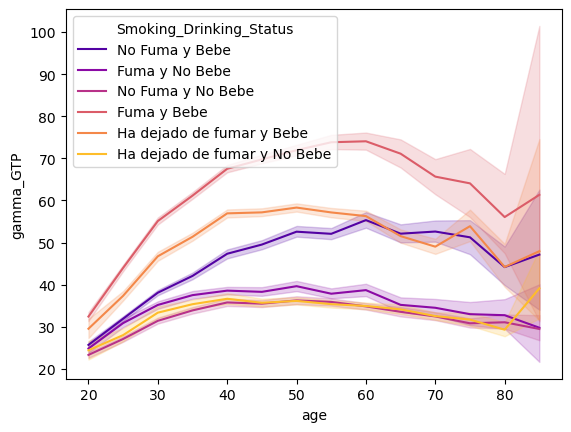

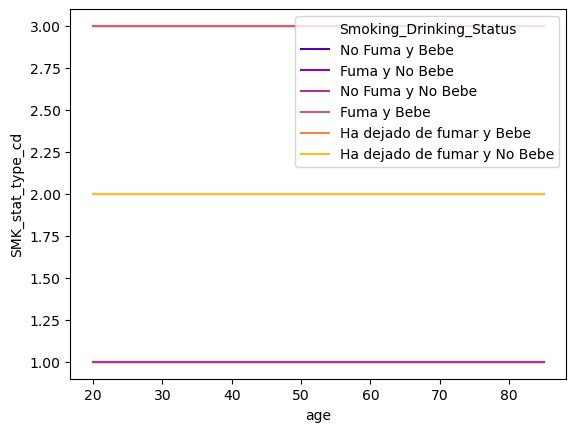

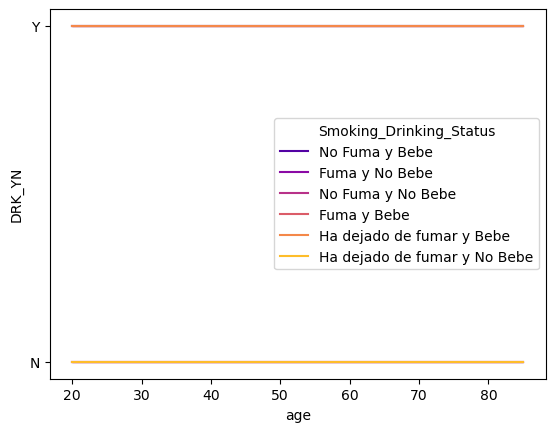

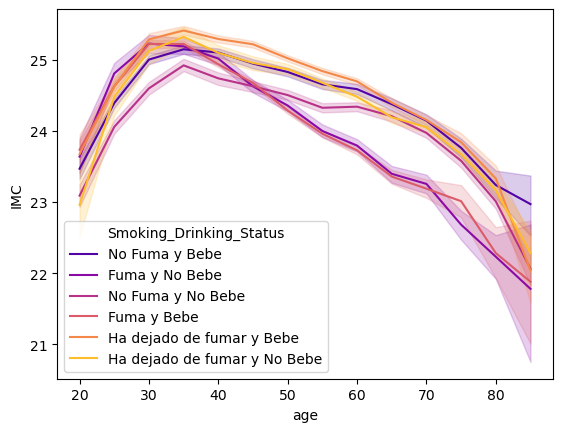

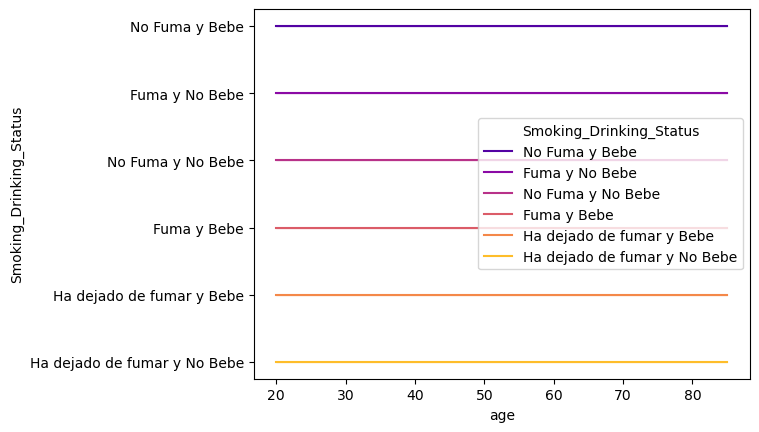

In [7]:
for i in df.columns:
    sns.lineplot(
        data=df_male,
        x="age",
        y=i,
        hue="Smoking_Drinking_Status",
        palette="plasma"
    )
    plt.show()

In [9]:
df_female = df[df["sex"] == "Female"]

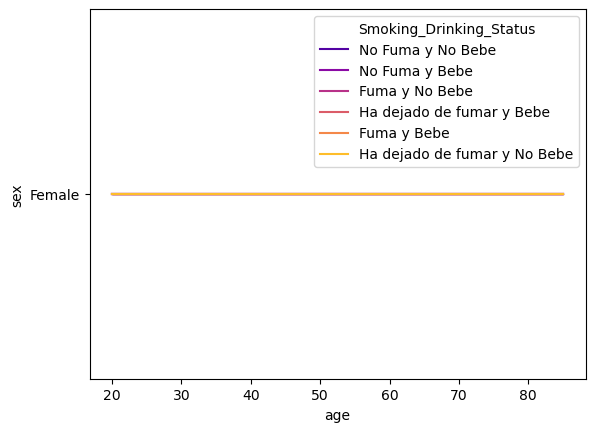

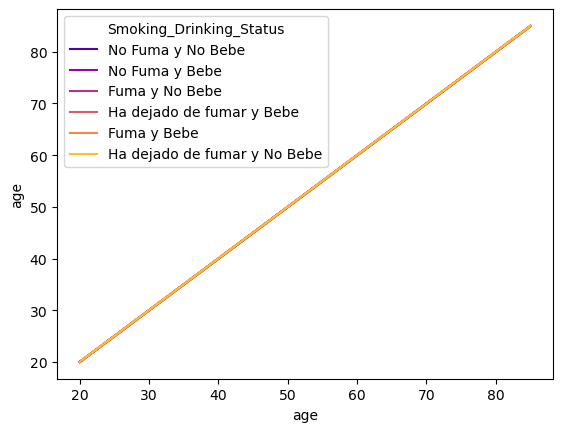

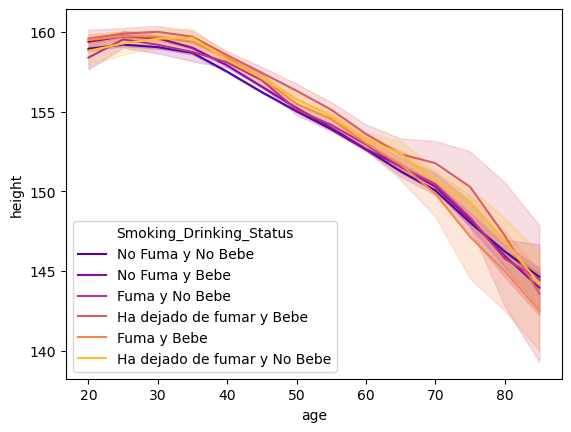

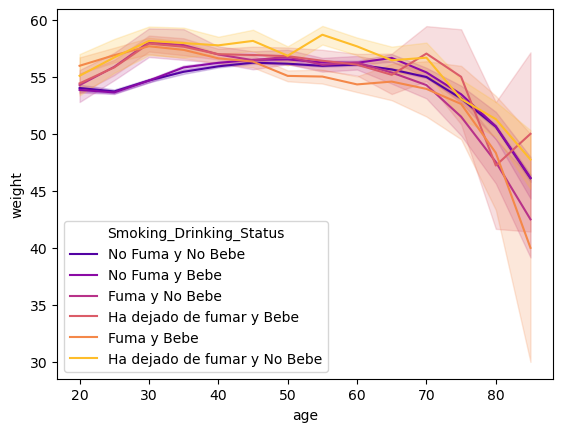

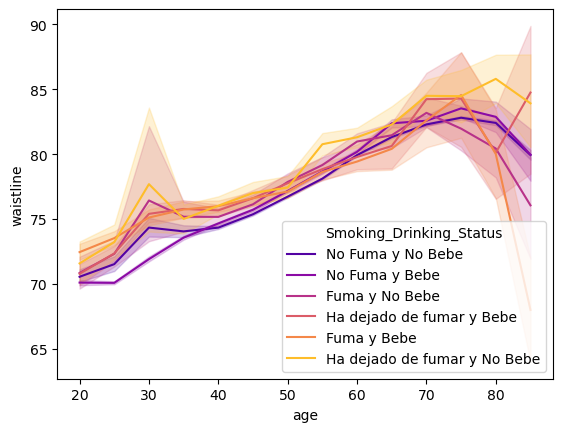

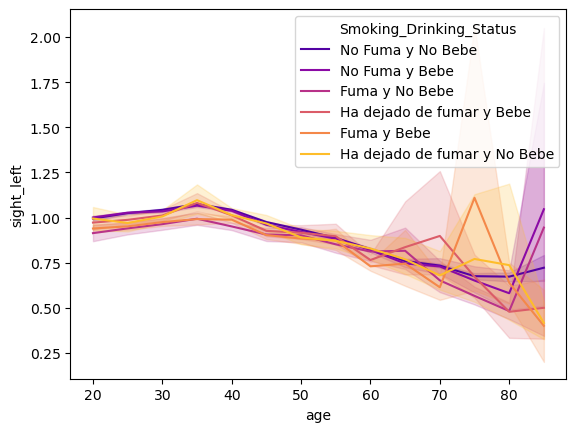

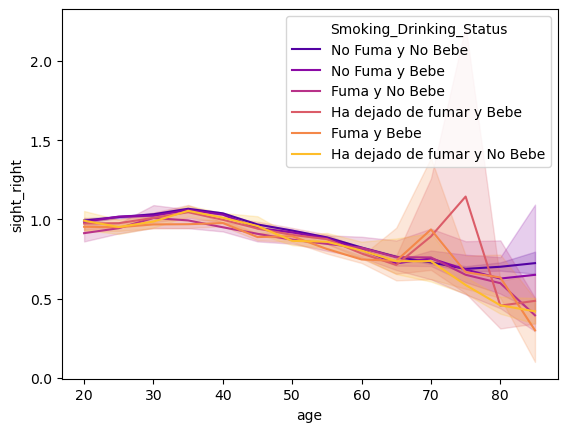

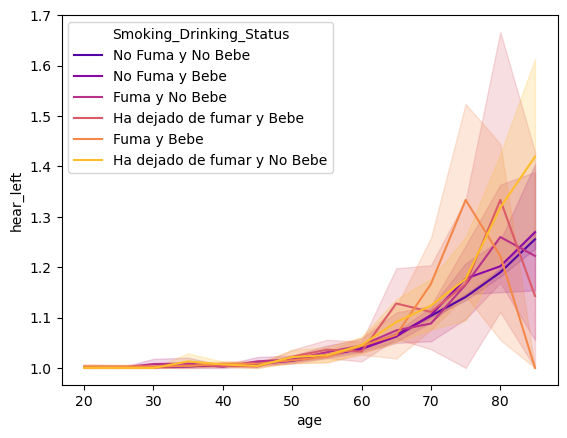

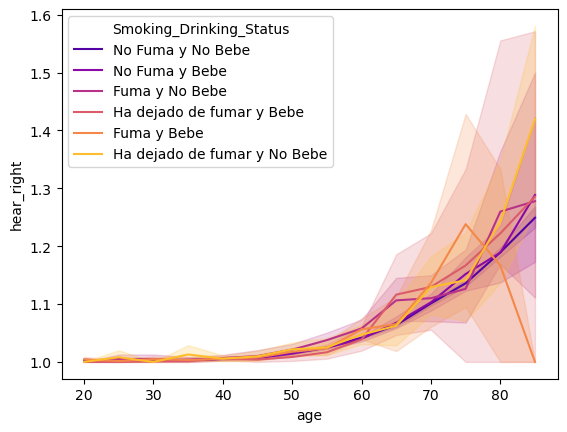

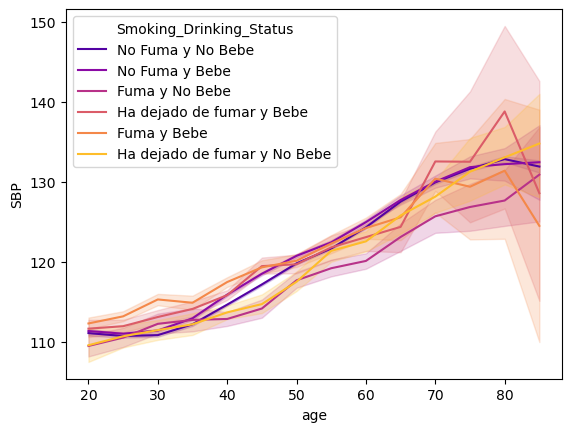

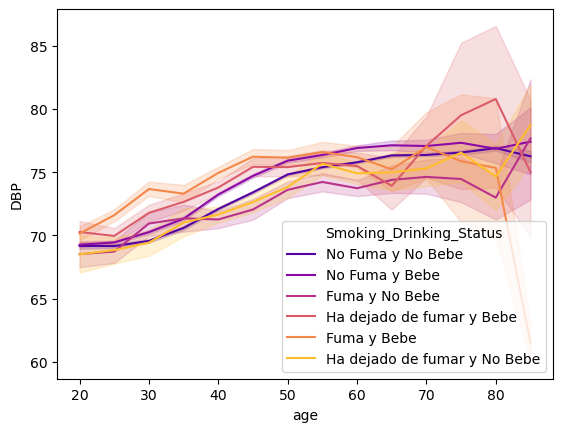

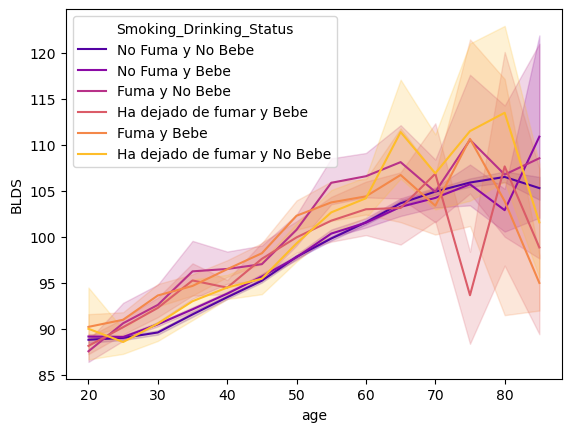

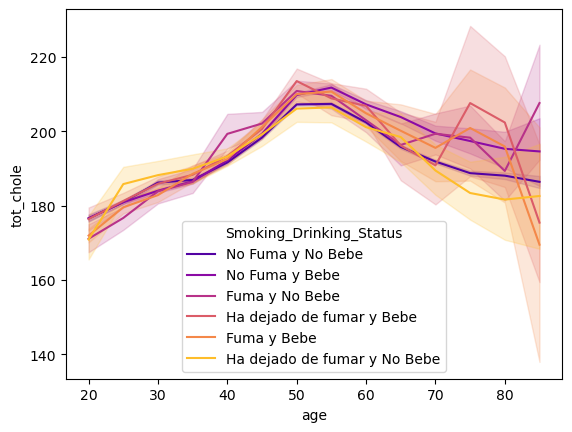

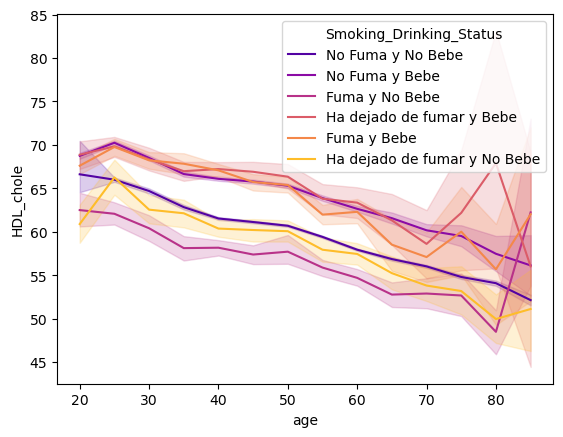

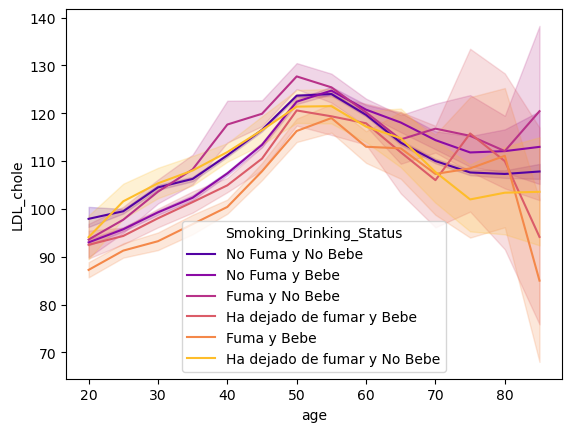

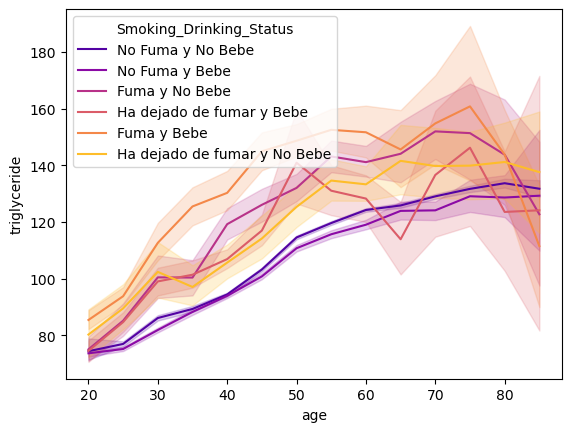

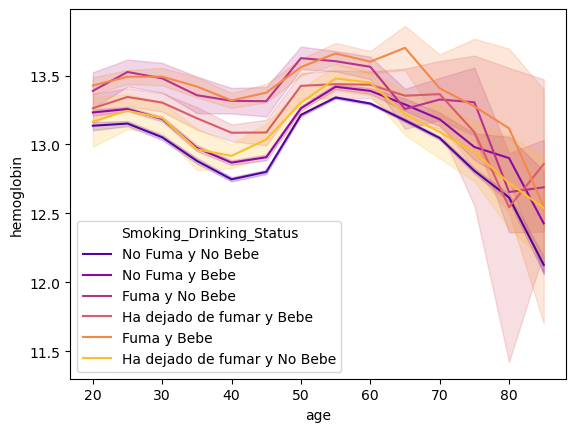

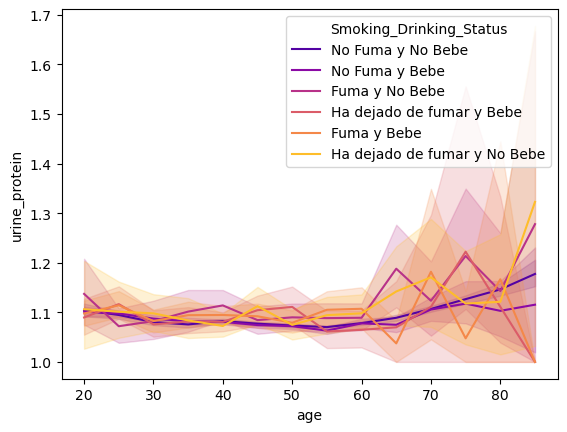

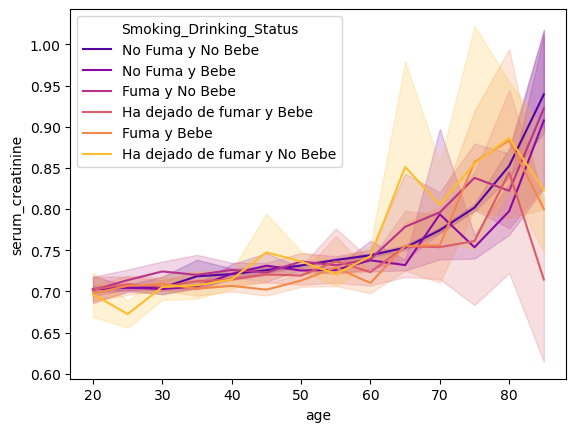

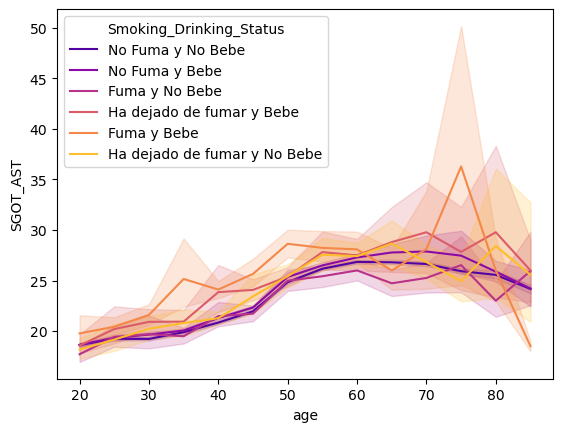

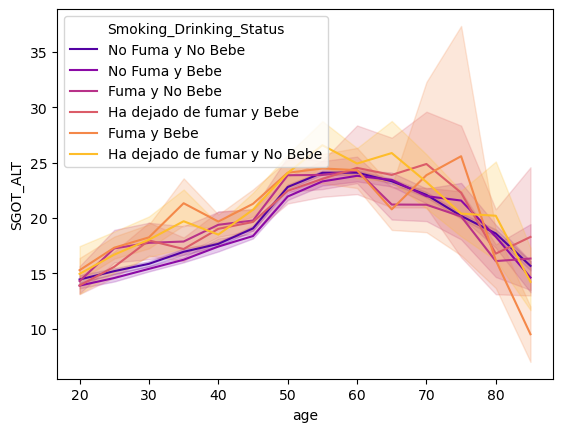

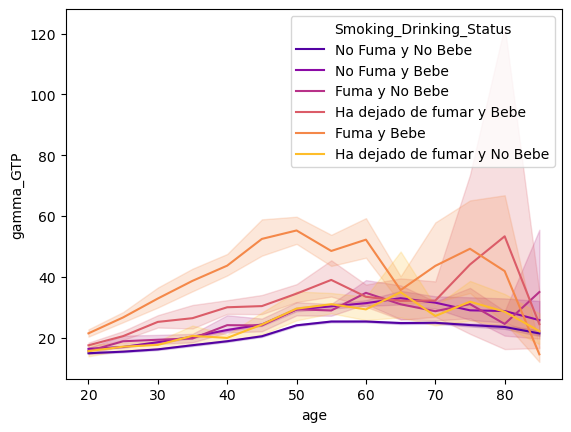

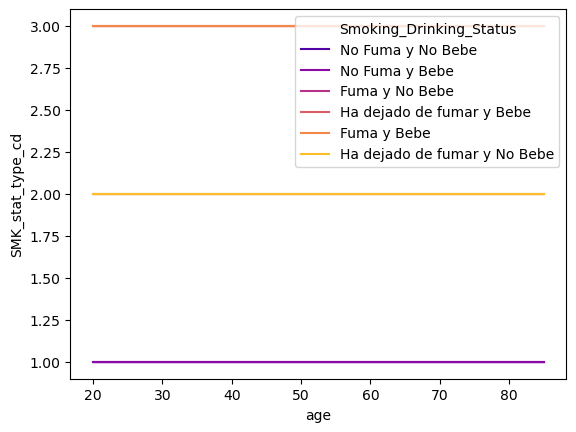

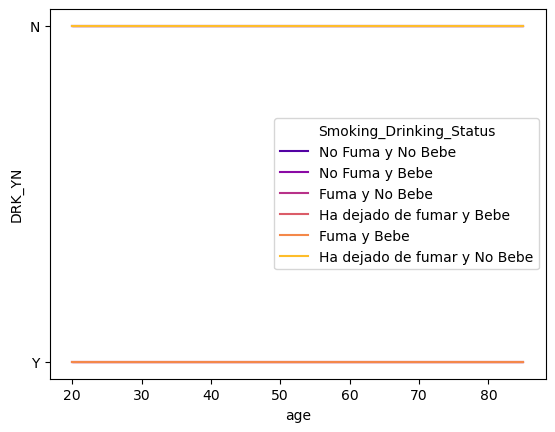

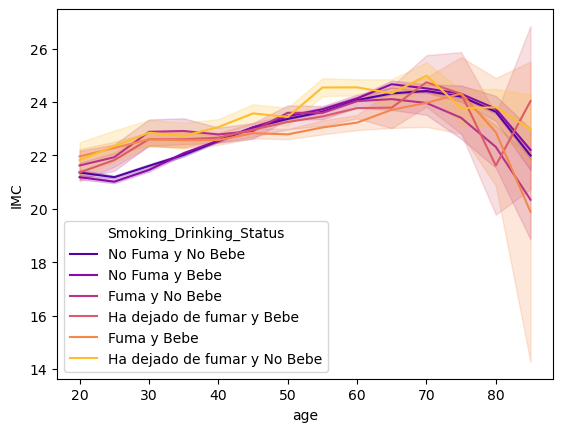

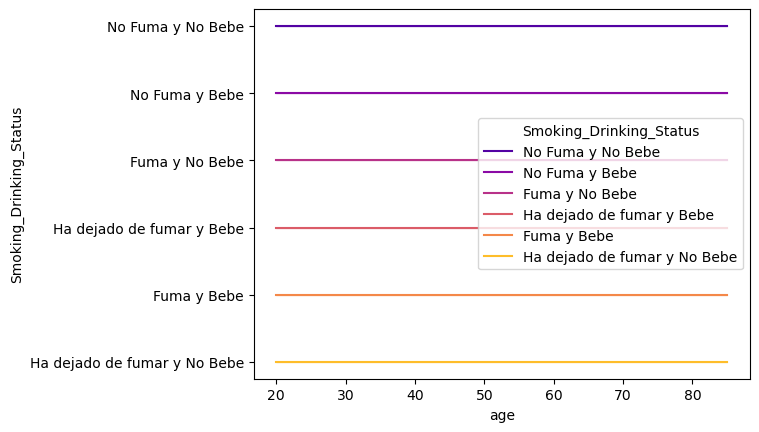

In [11]:
for i in df.columns:
    sns.lineplot(
        data=df_female,
        x="age",
        y=i,
        hue="Smoking_Drinking_Status",
        palette="plasma"
    )
    plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = ["sex","DRK_YN","Smoking_Drinking_Status","SMK_stat_type_cd"]
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0    1   35     170      75       90.0         1.0          1.0          1   
1    1   30     180      80       89.0         0.9          1.2          1   
2    1   40     165      75       91.0         1.2          1.5          1   
3    1   50     175      80       91.0         1.5          1.2          1   
4    1   50     165      60       80.0         1.0          1.2          1   

   hear_right  SBP  ...  hemoglobin  urine_protein  serum_creatinine  \
0           1  120  ...        17.1              1               1.0   
1           1  130  ...        15.8              1               0.9   
2           1  120  ...        15.8              1               0.9   
3           1  145  ...        17.6              1               1.1   
4           1  138  ...        13.8              1               0.8   

   SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN        IMC  \
0        21        35         40                 0       1  25.951557   
1        20        36         27                 2       0  24.691358   
2        47        32         68                 0       0  27.548209   
3        29        34         18                 0       0  26.122449   
4        19        12         25                 0       0  22.038567   

   Smoking_Drinking_Status  
0                        4  
1                        1  
2                        5  
3                        5  
4                        5  

[5 rows x 26 columns]

### Regresiones Lineales:

###### ignorar las de smk, drk y smk_drk

Mean Squared Error de sex : 0.06650285752045905
R^2 Score de sex: 0.73300663117197


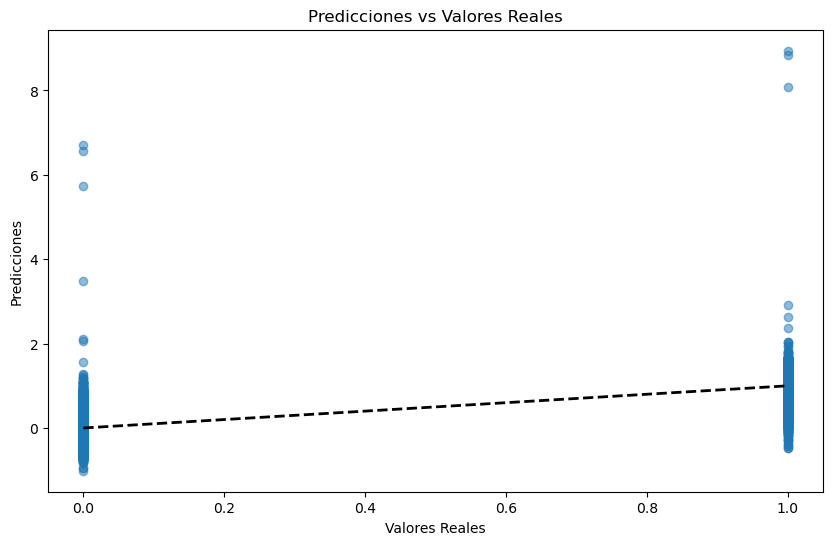

Mean Squared Error de age : 114.72657940064589
R^2 Score de age: 0.4287819949284182


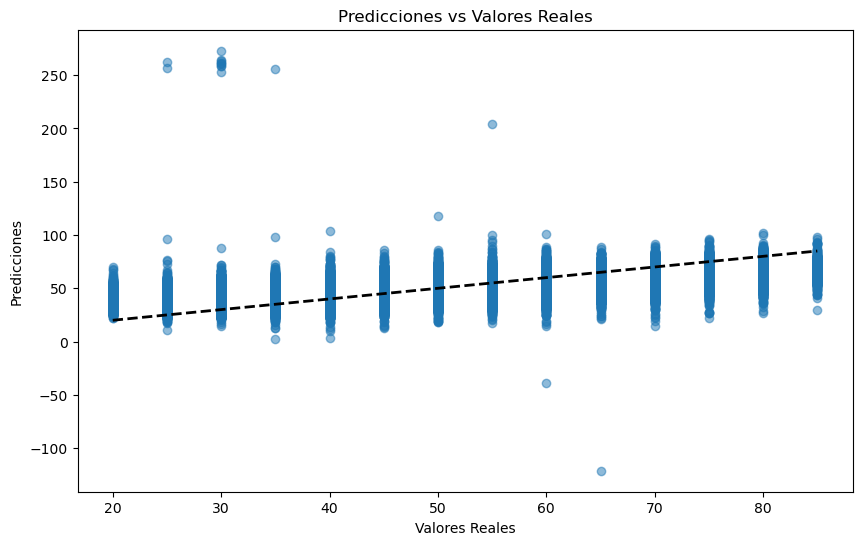

Mean Squared Error de height : 1.7838485189138202
R^2 Score de height: 0.9793610945595794


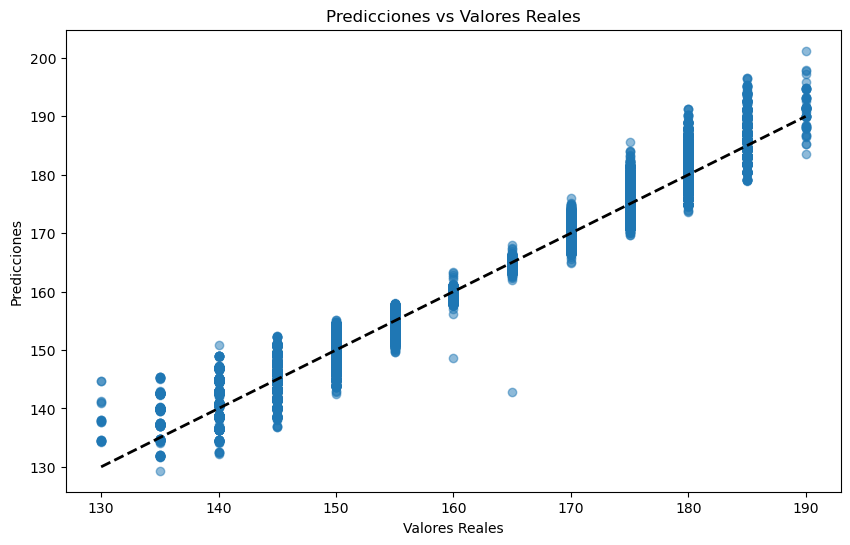

Mean Squared Error de weight : 1.1719520390895872
R^2 Score de weight: 0.9925330551835786


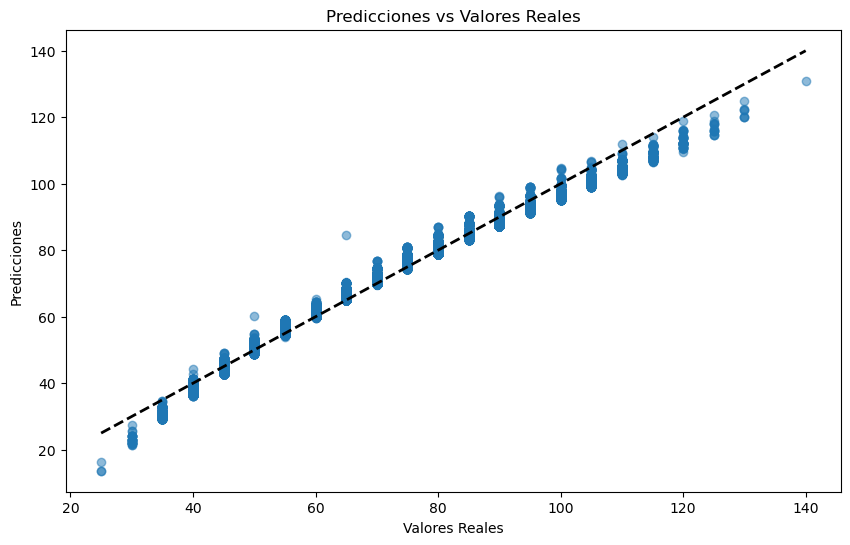

Mean Squared Error de waistline : 72.97221104085476
R^2 Score de waistline: 0.4891154586461134


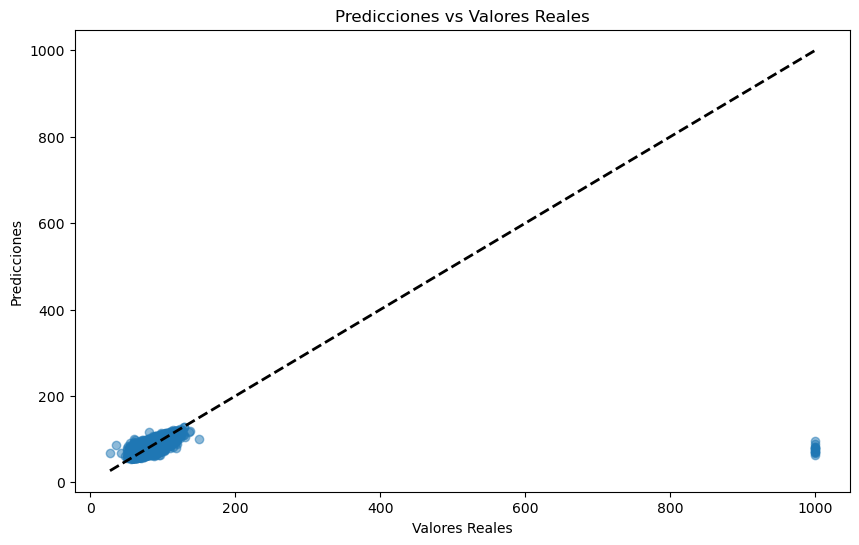

Mean Squared Error de sight_left : 0.3258186731472409
R^2 Score de sight_left: 0.11804282985976189


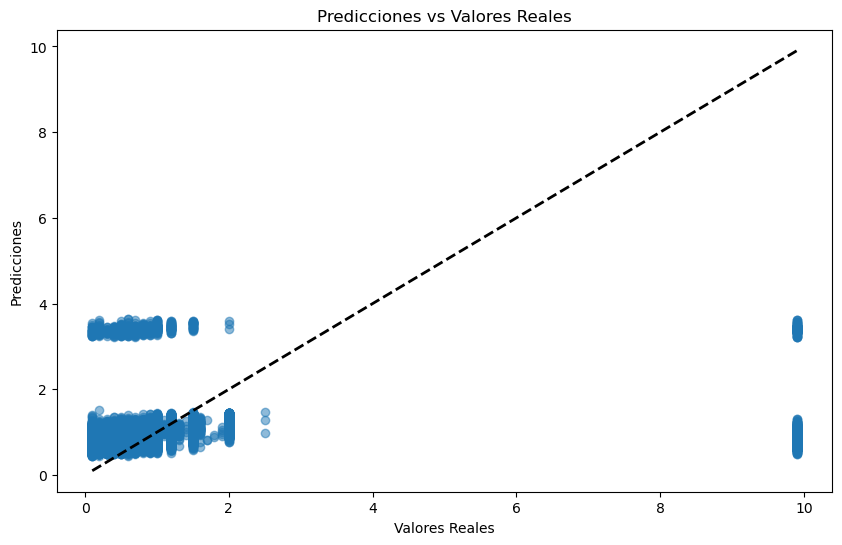

Mean Squared Error de sight_right : 0.3218912394443685
R^2 Score de sight_right: 0.11795969009420115


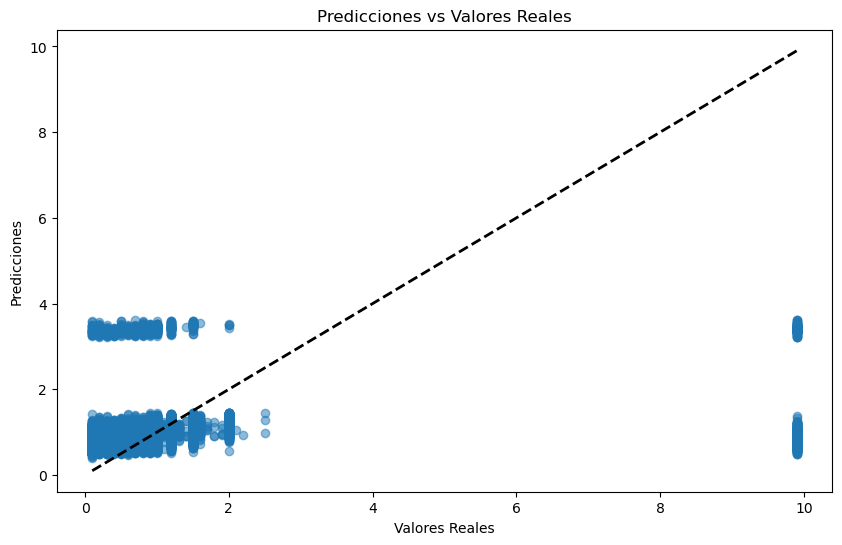

Mean Squared Error de hear_left : 0.02207109147743164
R^2 Score de hear_left: 0.2864292694750332


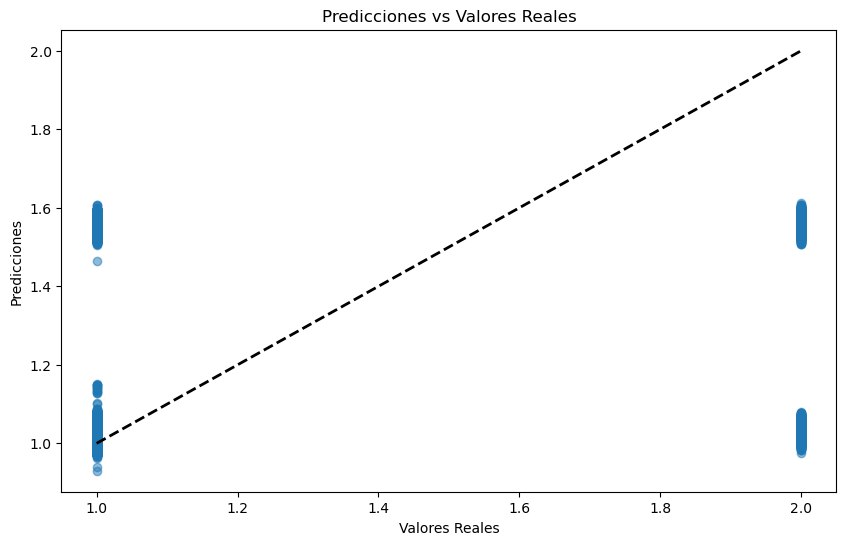

Mean Squared Error de hear_right : 0.02126278631254
R^2 Score de hear_right: 0.28433894292053197


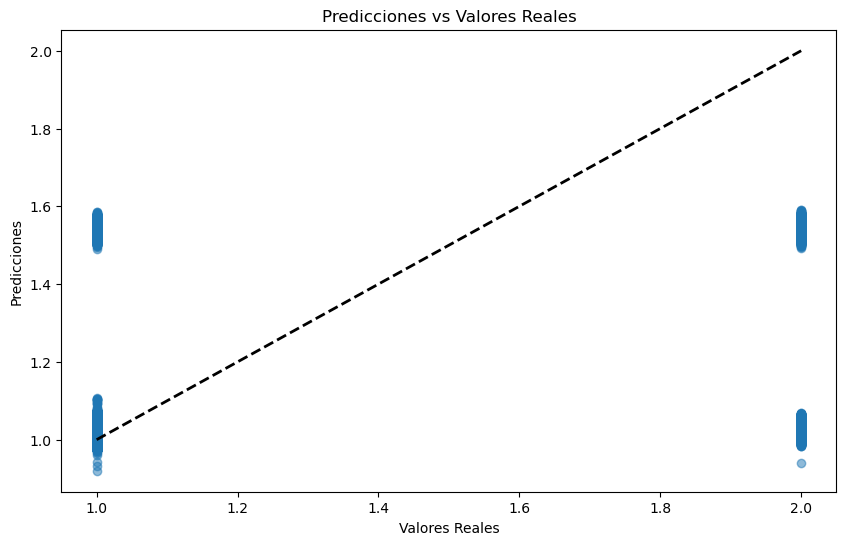

Mean Squared Error de SBP : 85.02546965258281
R^2 Score de SBP: 0.5976603446695442


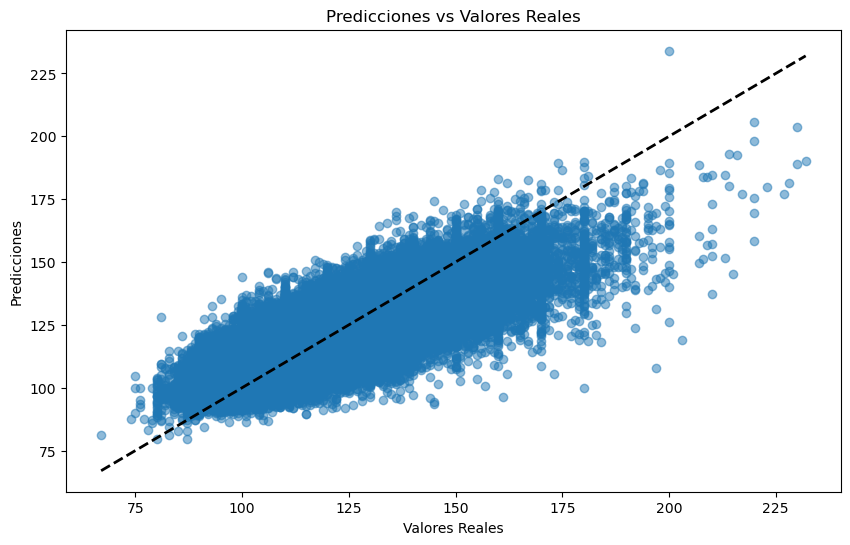

Mean Squared Error de DBP : 41.7325591618187
R^2 Score de DBP: 0.5741620189683655


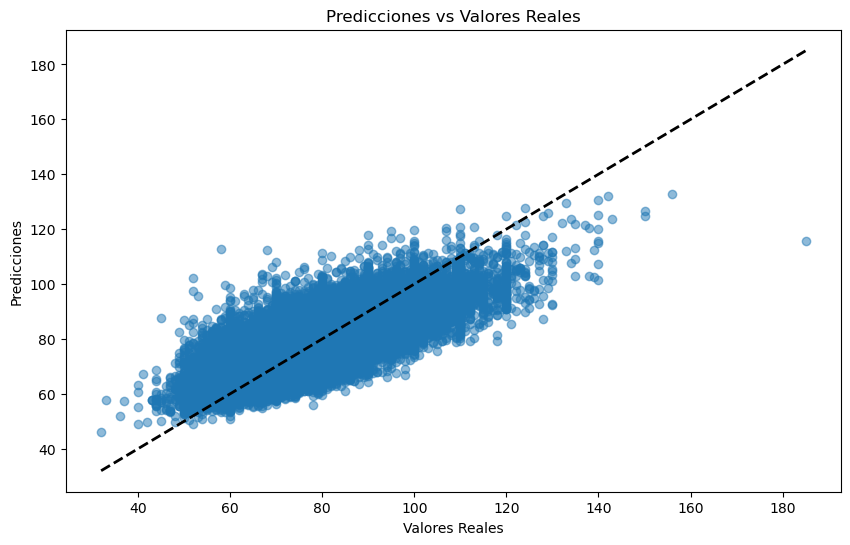

Mean Squared Error de BLDS : 508.26936352206917
R^2 Score de BLDS: 0.12139715618760838


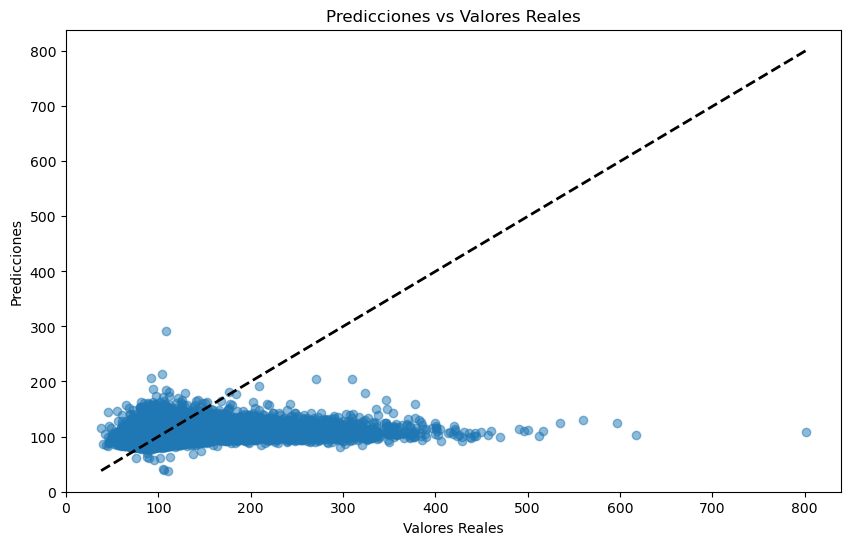

Mean Squared Error de tot_chole : 143.6528388211281
R^2 Score de tot_chole: 0.9051120605559204


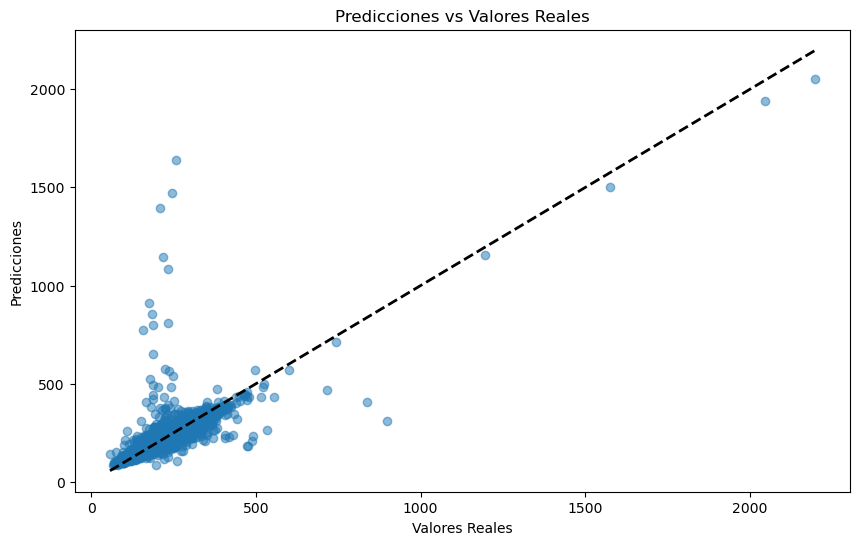

Mean Squared Error de HDL_chole : 90.1769873710368
R^2 Score de HDL_chole: 0.6148283079161041


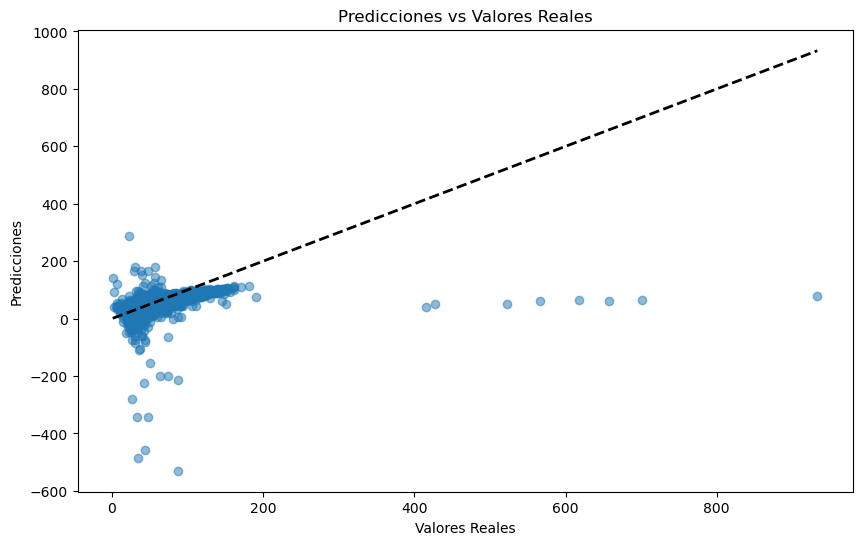

Mean Squared Error de LDL_chole : 146.21993823539435
R^2 Score de LDL_chole: 0.8878040646225439


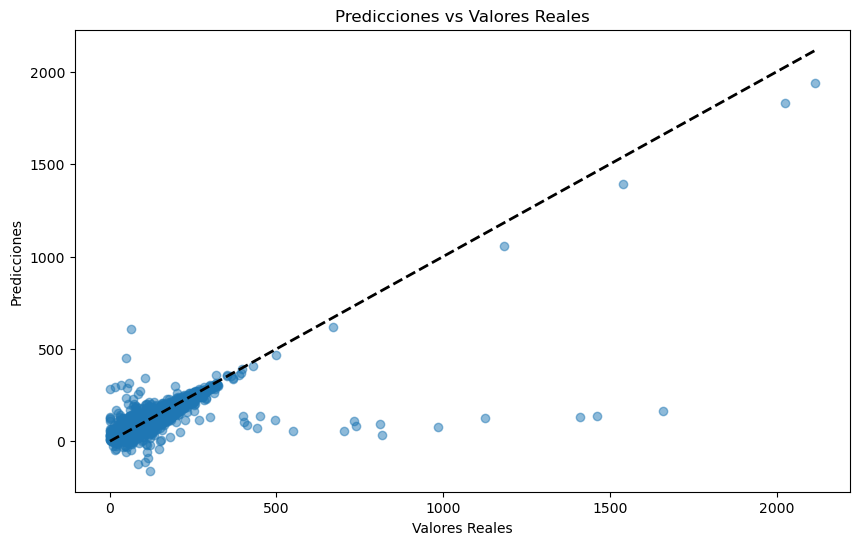

Mean Squared Error de triglyceride : 3990.9794281432714
R^2 Score de triglyceride: 0.6018192434148708


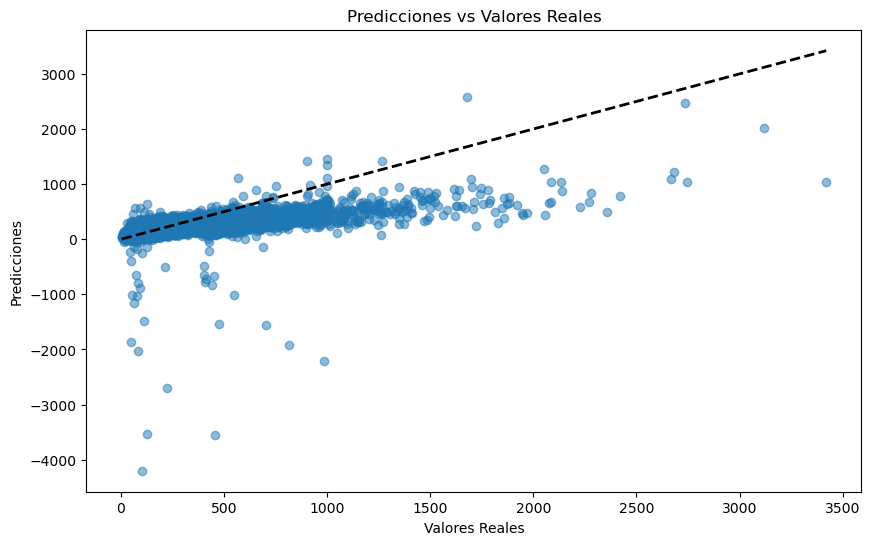

Mean Squared Error de hemoglobin : 1.2347800936362447
R^2 Score de hemoglobin: 0.5075980844003889


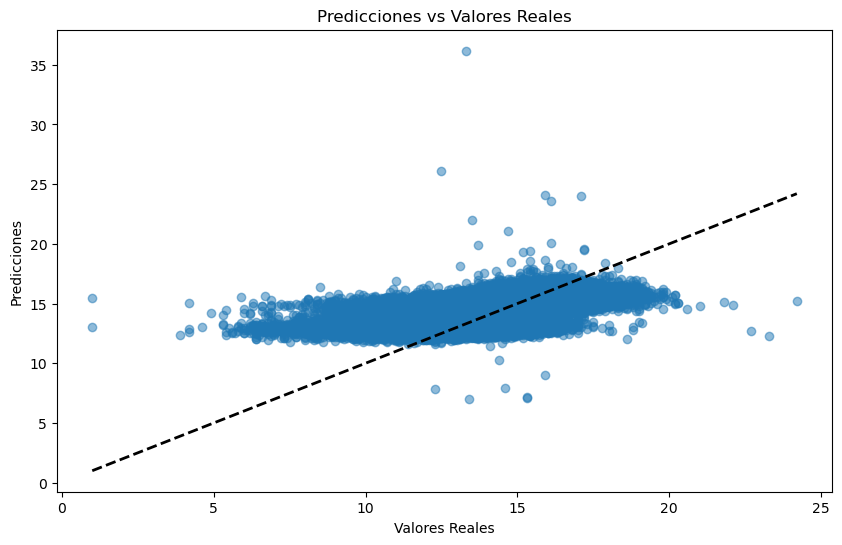

Mean Squared Error de urine_protein : 0.18792362505115928
R^2 Score de urine_protein: 0.021018840982906184


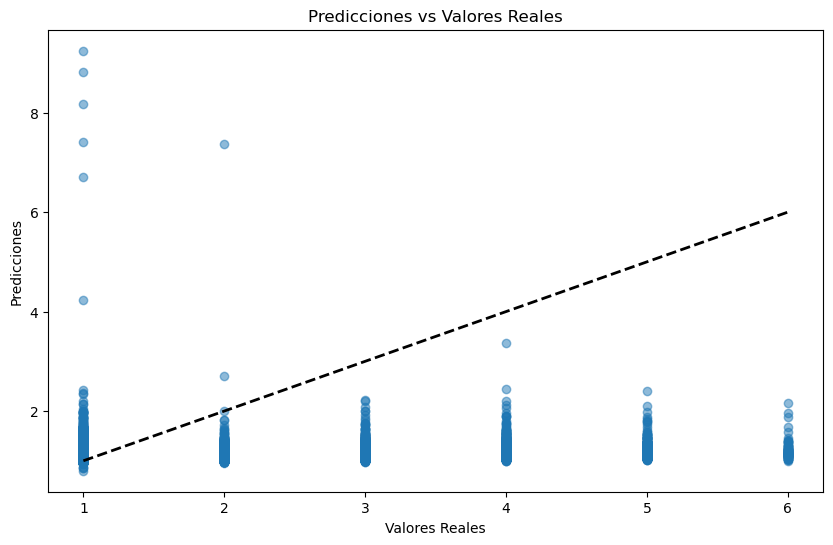

Mean Squared Error de serum_creatinine : 0.27857802008985943
R^2 Score de serum_creatinine: 0.05511111146409875


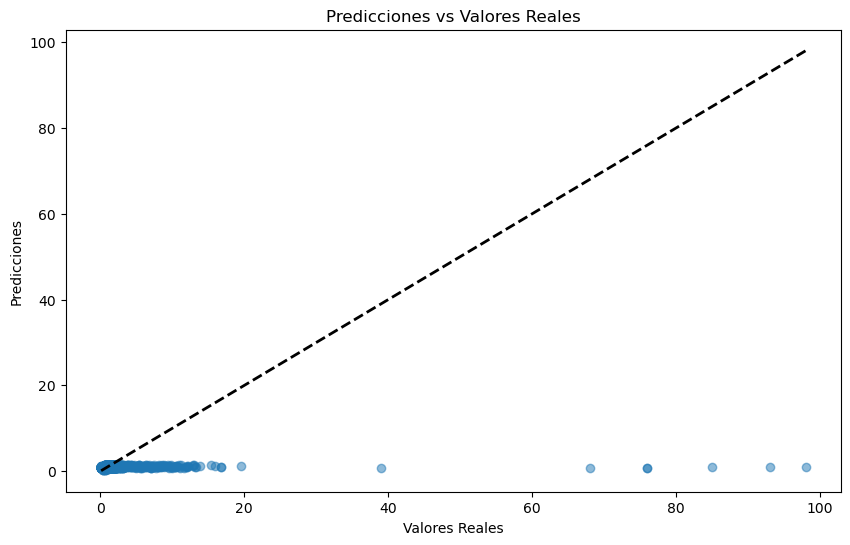

Mean Squared Error de SGOT_AST : 270.5235655201984
R^2 Score de SGOT_AST: 0.5093366995077249


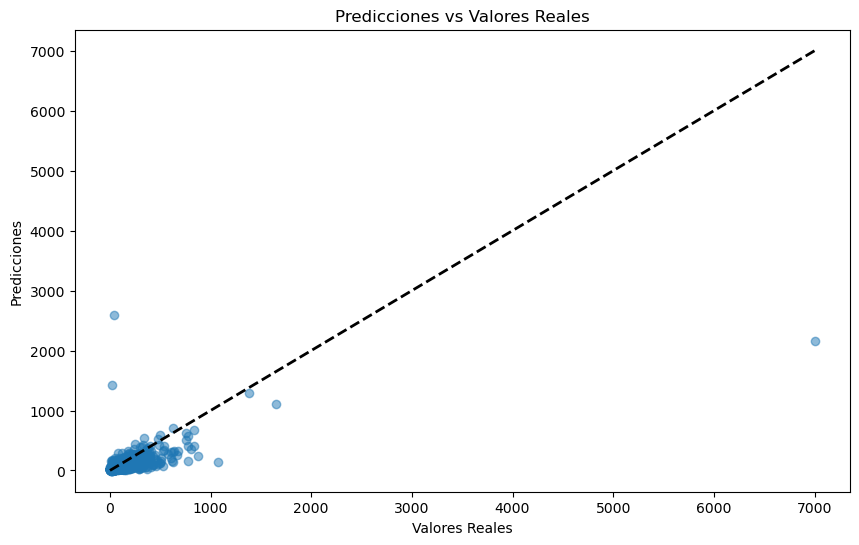

Mean Squared Error de SGOT_ALT : 347.7545003662649
R^2 Score de SGOT_ALT: 0.5351152102219886


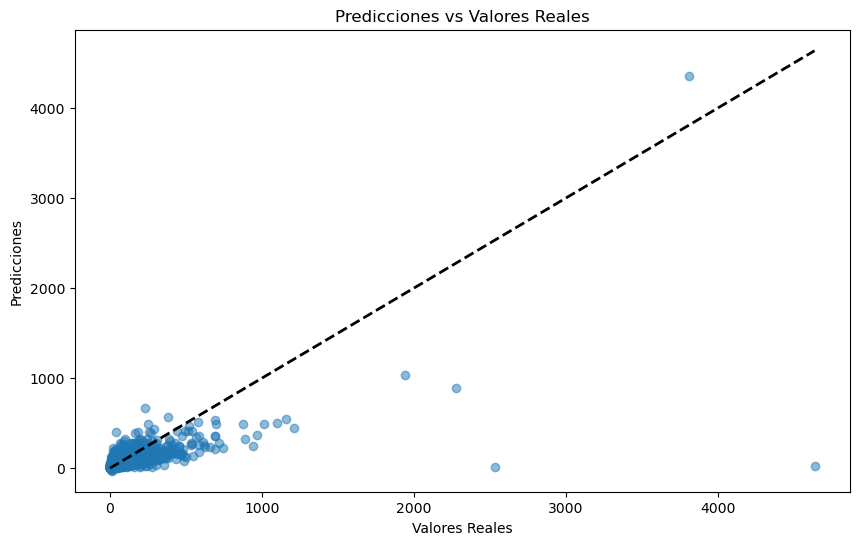

Mean Squared Error de gamma_GTP : 1914.5767081039714
R^2 Score de gamma_GTP: 0.2553678094891195


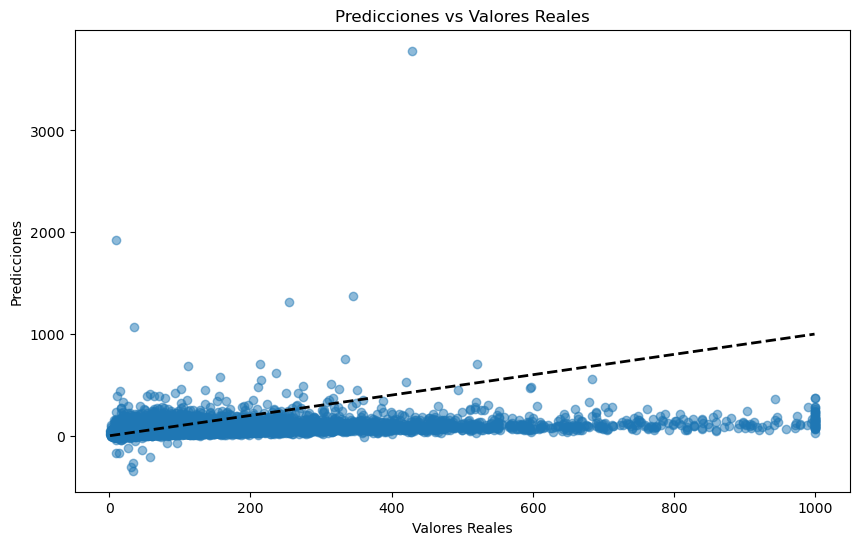

Mean Squared Error de SMK_stat_type_cd : 2.1253125848787717e-27
R^2 Score de SMK_stat_type_cd: 1.0


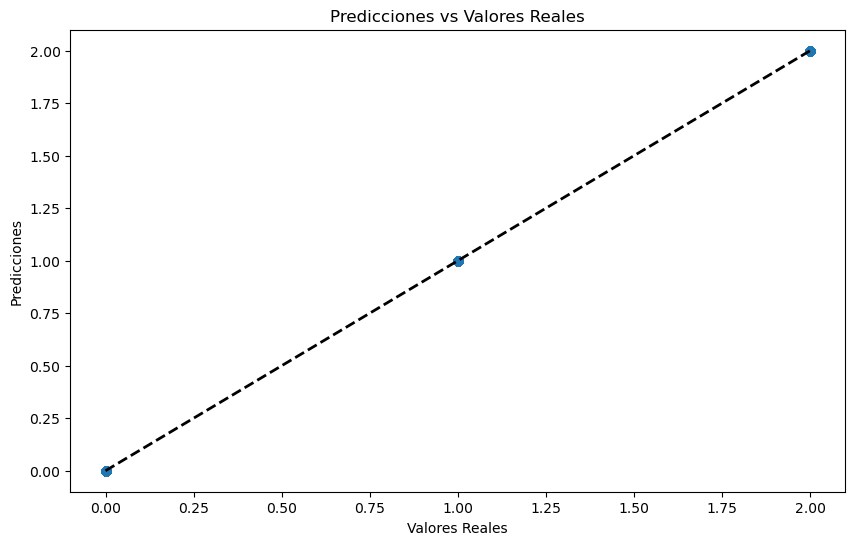

Mean Squared Error de DRK_YN : 8.662230587731632e-27
R^2 Score de DRK_YN: 1.0


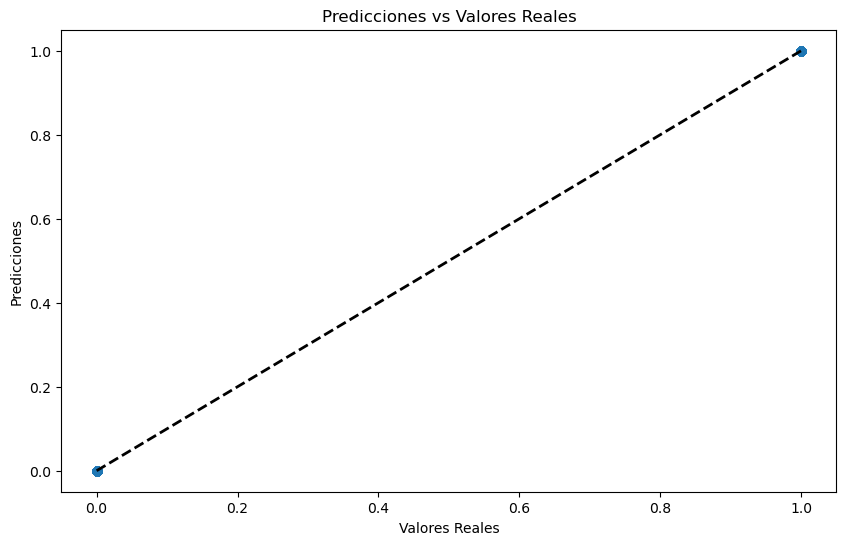

Mean Squared Error de IMC : 0.16512232260843338
R^2 Score de IMC: 0.9866221888490049


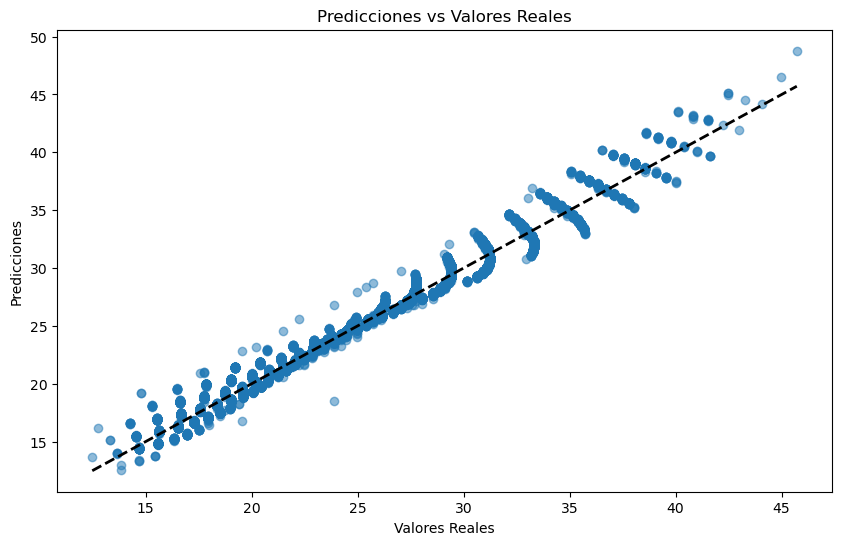

Mean Squared Error de Smoking_Drinking_Status : 7.909703868203526e-26
R^2 Score de Smoking_Drinking_Status: 1.0


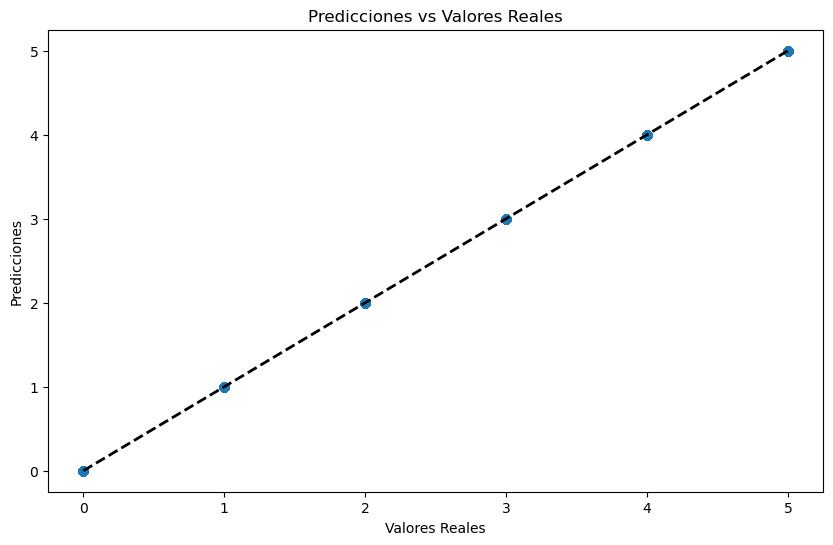

In [47]:
for i in df.columns:
    X = df.drop([i], axis=1)
    y = df[i]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Mean Squared Error de {i} : {mse}')
    print(f'R^2 Score de {i}: {r2}')
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title('Predicciones vs Valores Reales')
    plt.show()